In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'sigmoid') # last layer for classification...
    # multiclass of 10 classes hence its 10 and sigmoid
])

In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
r = model.fit(x_train,y_train,validation_data= (x_test,y_test),epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3032 - accuracy: 0.9125 - val_loss: 0.1444 - val_accuracy: 0.9576
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1467 - accuracy: 0.9566 - val_loss: 0.1081 - val_accuracy: 0.9675
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1117 - accuracy: 0.9668 - val_loss: 0.0882 - val_accuracy: 0.9740
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0909 - accuracy: 0.9724 - val_loss: 0.0765 - val_accuracy: 0.9767
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0758 - accuracy: 0.9759 - val_loss: 0.0816 - val_accuracy: 0.9748
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0770 - val_accuracy: 0.9784
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0595 - accuracy: 0.9809 - val_loss: 0.0751 - val_accurac

In [13]:
import matplotlib.pyplot as plt

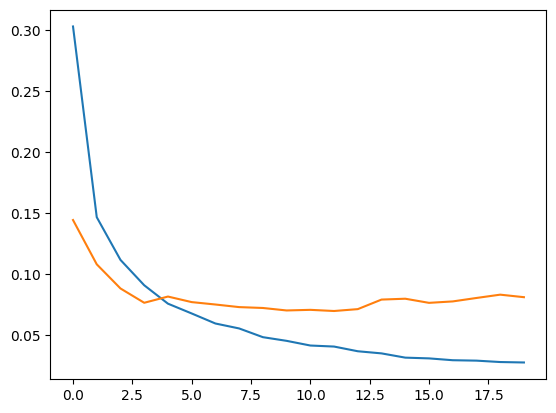

In [14]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')

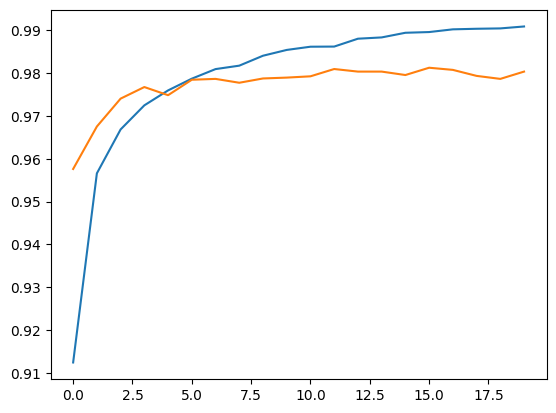

In [15]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9803


[0.08108005672693253, 0.9803000092506409]

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [20]:
ans = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,ans)

313/313 [==============================] - 1s 4ms/step


In [21]:
cm

array([[ 969,    0,    3,    2,    0,    0,    2,    2,    2,    0],
       [   0, 1126,    3,    1,    0,    0,    2,    0,    3,    0],
       [   1,    3, 1017,    3,    1,    0,    2,    4,    1,    0],
       [   0,    1,    5,  993,    0,    3,    0,    1,    2,    5],
       [   0,    0,    3,    0,  967,    0,    3,    2,    0,    7],
       [   1,    2,    0,   13,    2,  863,    2,    2,    6,    1],
       [   4,    1,    2,    1,    2,    4,  944,    0,    0,    0],
       [   1,    6,   10,    4,    0,    0,    0,  999,    2,    6],
       [   1,    0,    3,    9,    5,    1,    2,    4,  945,    4],
       [   1,    3,    0,    4,   13,    2,    0,    5,    4,  977]])

In [35]:
def plot(cm,classes,normalize=False,title='confusionMatric',cmap =plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('normalised cm')

  else : print('cm without norm')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  ticks = np.arange(len(classes))
  plt.xticks(ticks,classes)
  plt.yticks(ticks,classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted')
  plt.show()

cm without norm
[[ 969    0    3    2    0    0    2    2    2    0]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   1    3 1017    3    1    0    2    4    1    0]
 [   0    1    5  993    0    3    0    1    2    5]
 [   0    0    3    0  967    0    3    2    0    7]
 [   1    2    0   13    2  863    2    2    6    1]
 [   4    1    2    1    2    4  944    0    0    0]
 [   1    6   10    4    0    0    0  999    2    6]
 [   1    0    3    9    5    1    2    4  945    4]
 [   1    3    0    4   13    2    0    5    4  977]]


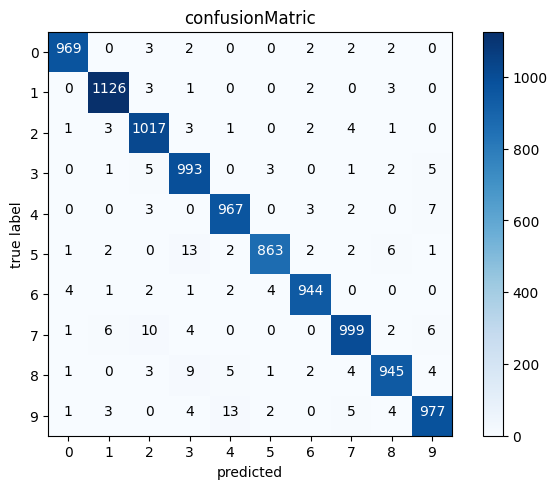

In [36]:
plot(cm,list(range(10)))

In [41]:
## to show misclassified examples
misclassifiedIdx = np.where(ans!=y_test)[0]

Text(0.5, 1.0, 'true albel: 2 predicted: 6')

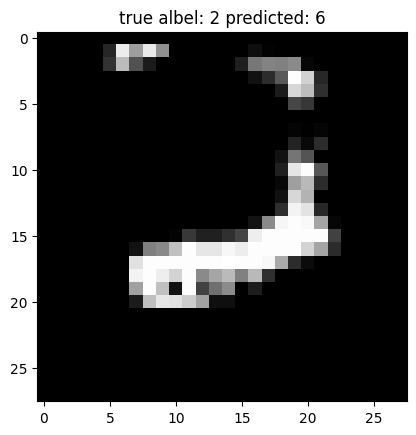

In [48]:
i = np.random.choice(misclassifiedIdx)
plt.imshow(x_test[i],cmap='gray')
plt.title("true albel: %s predicted: %s" %(y_test[i],ans[i]))